# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [107]:
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
filename = os.path.join(os.getcwd(),"data","adultData.csv")
df = pd.read_csv(filename,header = 0)

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
#size of the data
df.shape

(32561, 15)

In [5]:
#viewing the data
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


### 2.1 Replacing missing values

In [6]:
#Finding missing values
nan_count = np.sum(df.isnull(),axis=0)
nan_count

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64

In [7]:
#Filling numeric missing values
df['age_na'] = df['age'].isnull()
df['hours-per-week_na'] = df['hours-per-week'].isnull()
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,age_na,hours-per-week_na
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K,False,False
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K,False,False
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K,False,False
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K,False,False
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K,False,False


In [8]:
#Checking the results
mean_ages = df['age'].mean()
mean_hours = df['hours-per-week'].mean()

df['age'].fillna(value=mean_ages,inplace=True)
df['hours-per-week'].fillna(value=mean_hours, inplace = True)

print(np.sum(df['age'].isnull(),axis=0))
print(np.sum(df['hours-per-week'].isnull(),axis=0))

0
0


In [9]:
#Replaceing non numeric with 'unknown' value
df['workclass'].fillna(value='unknown',inplace=True)
df['occupation'].fillna(value='unknown',inplace=True)
df['native-country'].fillna(value='unknown',inplace=True)
nan_count = np.sum(df.isnull(),axis=0)
nan_count

age                  0
workclass            0
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation           0
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
income_binary        0
age_na               0
hours-per-week_na    0
dtype: int64

### 2.2 Finding and Replacing outliers

In [10]:
#checking data type
df.dtypes

age                  float64
workclass             object
fnlwgt                 int64
education             object
education-num          int64
marital-status        object
occupation            object
relationship          object
race                  object
sex_selfID            object
capital-gain           int64
capital-loss           int64
hours-per-week       float64
native-country        object
income_binary         object
age_na                  bool
hours-per-week_na       bool
dtype: object

In [11]:
#finding z scores for all 
df_zscores = df.select_dtypes(include = ['number']).apply(stats.zscore)
df_zscores.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.030174,-1.063611,1.134739,0.643799,-0.21666,-0.036645
1,0.838186,-1.008707,1.134739,-0.254491,-0.21666,-2.233240
2,-0.043281,0.245079,-0.420060,-0.254491,-0.21666,-0.036645
3,1.058553,0.425801,-1.197459,-0.254491,-0.21666,-0.036645
4,-0.777838,1.408176,1.134739,-0.254491,-0.21666,-0.036645


In [12]:
numerical_columns = df_zscores.columns

In [13]:
#Finding and replacing outliers 
z_threshold = 3
outliers = pd.DataFrame()
for column in numerical_columns:
    column_outliers = df[df_zscores[column].abs() > z_threshold]
    outliers = pd.concat([outliers, column_outliers])
outliers

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,age_na,hours-per-week_na
222,90.0,Private,51744,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Non-Female,0,2206,40.0,United-States,<=50K,False,False
430,80.0,unknown,107762,HS-grad,9,Widowed,unknown,Not-in-family,White,Non-Female,0,0,24.0,United-States,<=50K,False,False
918,81.0,Self-emp-not-inc,136063,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,30.0,United-States,<=50K,False,False
1040,90.0,Private,137018,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,40.0,United-States,<=50K,False,False
1168,88.0,Self-emp-not-inc,206291,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Non-Female,0,0,40.0,United-States,<=50K,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32469,58.0,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99.0,unknown,<=50K,False,False
32476,35.0,Private,30673,12th,8,Married-civ-spouse,Craft-repair,Husband,White,Non-Female,0,0,84.0,United-States,<=50K,False,False
32494,82.0,unknown,403910,HS-grad,9,Never-married,unknown,Not-in-family,White,Non-Female,0,0,3.0,United-States,<=50K,False,False
32525,81.0,unknown,120478,Assoc-voc,11,Divorced,unknown,Unmarried,White,Female,0,0,1.0,unknown,<=50K,False,False


Comment: We can see that there is a great number of outliers, hence we will be using the winsorize methode to cap those down rather than removing them

In [14]:
#winsorizing to get rid of outliers
for column in numerical_columns:
    df[column+'-win']=stats.mstats.winsorize(df[column],limits=[0.01,0.01])
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,...,native-country,income_binary,age_na,hours-per-week_na,age-win,fnlwgt-win,education-num-win,capital-gain-win,capital-loss-win,hours-per-week-win
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,...,United-States,<=50K,False,False,39.0,77516,13,2174,0,40.0
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,...,United-States,<=50K,False,False,50.0,83311,13,0,0,13.0
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,...,United-States,<=50K,False,False,38.0,215646,9,0,0,40.0
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,...,United-States,<=50K,False,False,53.0,234721,7,0,0,40.0
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,Cuba,<=50K,False,False,28.0,338409,13,0,0,40.0


### 2.3 Addressing Class Imbalance

In [15]:
class_counts = df['income_binary'].value_counts()
class_counts

<=50K    24720
>50K      7841
Name: income_binary, dtype: int64

In [18]:
class_proportions = class_counts/len(df)
class_proportions

<=50K    0.75919
>50K     0.24081
Name: income_binary, dtype: float64

In [22]:
percentage = 0.3
num_rows = df.shape[0]

indices = np.random.choice(df.index,size=int(percentage*num_rows),replace=False)
df_subset = df.loc[indices]
df_subset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,...,native-country,income_binary,age_na,hours-per-week_na,age-win,fnlwgt-win,education-num-win,capital-gain-win,capital-loss-win,hours-per-week-win
2262,46.0,Private,169180,Assoc-voc,11,Divorced,Adm-clerical,Not-in-family,White,Female,...,United-States,<=50K,False,False,46.0,169180,11,0,0,40.0
25857,43.0,Private,393354,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,Black,Female,...,United-States,>50K,False,False,43.0,393354,10,0,0,38.0
4959,60.0,Private,227332,Assoc-voc,11,Widowed,Adm-clerical,Not-in-family,White,Non-Female,...,United-States,<=50K,False,False,60.0,227332,11,0,0,40.0
16445,52.0,Private,172165,10th,6,Divorced,Other-service,Other-relative,White,Female,...,United-States,<=50K,False,False,52.0,172165,6,0,0,25.0
11779,31.0,Private,164243,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Non-Female,...,United-States,<=50K,False,False,31.0,164243,10,0,1579,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14460,24.0,Private,209782,Bachelors,13,Never-married,Sales,Own-child,White,Female,...,United-States,<=50K,False,False,24.0,209782,13,0,0,40.0
9292,48.0,Private,185041,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Non-Female,...,United-States,<=50K,False,False,48.0,185041,4,0,1672,55.0
9989,35.0,Private,186489,9th,5,Married-civ-spouse,Handlers-cleaners,Husband,White,Non-Female,...,United-States,<=50K,False,False,35.0,186489,5,0,0,46.0
24674,25.0,Private,113099,HS-grad,9,Separated,Craft-repair,Not-in-family,Black,Non-Female,...,United-States,<=50K,False,False,25.0,113099,9,0,0,40.0


In [23]:
unique_ssID = df['sex_selfID'].unique()
unique_ssID

array(['Non-Female', 'Female'], dtype=object)

In [24]:
percent_female = np.sum(df_subset['sex_selfID']=='Female')/df_subset['sex_selfID'].shape[0]
percent_female

0.3202293202293202

In [28]:
counts = df_subset['sex_selfID'].value_counts()
counts

Non-Female    6640
Female        3128
Name: sex_selfID, dtype: int64

Looking at the female, non female ratio we can say that the data is balanced based on sex. 

### 2.4 One hot encoding of catagorial features

In [15]:
categorical_features = ['workclass','education','marital-status','occupation','relationship', 'race','sex_selfID','native-country']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)
df=df_encoded
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income_binary,age_na,hours-per-week_na,age-win,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,native-country_unknown
0,39.0,77516,13,2174,0,40.0,<=50K,False,False,39.0,...,0,0,0,0,0,0,1,0,0,0
1,50.0,83311,13,0,0,13.0,<=50K,False,False,50.0,...,0,0,0,0,0,0,1,0,0,0
2,38.0,215646,9,0,0,40.0,<=50K,False,False,38.0,...,0,0,0,0,0,0,1,0,0,0
3,53.0,234721,7,0,0,40.0,<=50K,False,False,53.0,...,0,0,0,0,0,0,1,0,0,0
4,28.0,338409,13,0,0,40.0,<=50K,False,False,28.0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
list(sorted(df_encoded.columns))

['age',
 'age-win',
 'age_na',
 'capital-gain',
 'capital-gain-win',
 'capital-loss',
 'capital-loss-win',
 'education-num',
 'education-num-win',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'fnlwgt',
 'fnlwgt-win',
 'hours-per-week',
 'hours-per-week-win',
 'hours-per-week_na',
 'income_binary',
 'marital-status_Married-AF-spouse',
 'marital-status_Married-civ-spouse',
 'marital-status_Married-spouse-absent',
 'marital-status_Never-married',
 'marital-status_Separated',
 'marital-status_Widowed',
 'native-country_Canada',
 'native-country_China',
 'native-country_Columbia',
 'native-country_Cuba',
 'native-country_Dominican-Republic',
 'native-country_Ecuador',
 'native-country_El-Salvador',
 

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

### 3.1 Feature Selection

In [110]:
feature_list = df.select_dtypes(include = ['number']).columns
feature_list

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'age-win', 'fnlwgt-win', 'education-num-win',
       'capital-gain-win', 'capital-loss-win', 'hours-per-week-win'],
      dtype='object')

### 3.2 creating training and testing data sets

In [111]:
y = df['income_binary']
X = df[feature_list]

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=1234)

### 3.3 Logistic Regression

In [66]:
 def train_test_LR(X_train, y_train, X_test, y_test, c=1):
    model = LogisticRegression(C=c)
    model.fit(X_train, y_train)
    probability_predictions = model.predict_proba(X_test)
    l_loss = log_loss(y_test, probability_predictions)
    class_label_predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, class_label_predictions)
    return l_loss, acc_score

In [67]:
loss, acc = train_test_LR(X_train, y_train, X_test, y_test)
print('Log loss: ' + str(loss))
print('Accuracy: ' + str(acc))

Log loss: 0.508549011502789
Accuracy: 0.8000186115764005


In [69]:
cs = [10**i for i in range(-10,10)] 
cs

[1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 1,
 10,
 100,
 1000,
 10000,
 100000,
 1000000,
 10000000,
 100000000,
 1000000000]

In [70]:
ll_cs = []
acc_cs = []
for c in cs:
    ll, acc = train_test_LR(X_train, y_train, X_test, y_test, c) 
    ll_cs.append(ll)
    acc_cs.append(acc)

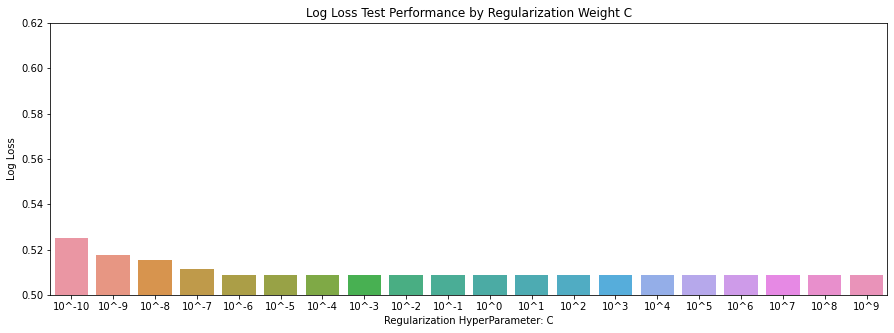

In [75]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x=cs, y=ll_cs)
g = ax.set_xticklabels([f'10^{i}' for i in range(-10,10)]) 
ax.set_xlabel('Regularization HyperParameter: C')
ax.set_ylabel('Log Loss')
ax.set_ylim([0.5, 0.62])
g = plt.title('Log Loss Test Performance by Regularization Weight C')

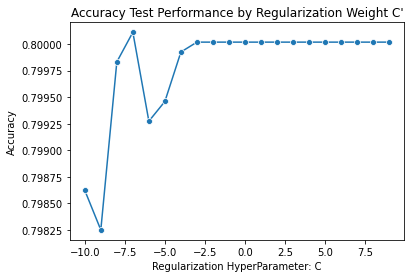

In [76]:
 fig = plt.figure()
ax = fig.add_subplot(111)
x = np.log10(cs)
sns.lineplot(x=x, y=acc_cs, marker='o')
plt.title("Accuracy Test Performance by Regularization Weight C'")
plt.xlabel("Regularization HyperParameter: C")
plt.ylabel("Accuracy")
plt.show()

### 3.4 Random Forest Classifiers

In [99]:
print('Begin Random Forest Implementation...')
rf_20_model = RandomForestClassifier(criterion='entropy',n_estimators=20)
rf_20_model.fit(X_train,y_train)
p20 = rf_20_model.predict_proba(X_test)[:,1]
rf_20_predictions = p20.tolist()
print(rf_20_predictions)
rf_100_model = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_100_model.fit(X_train,y_train)
p100 = rf_20_model.predict_proba(X_test)[:,1]
rf_100_predictions = p100.tolist()
print(rf_100_predictions)
print('End')

Begin Random Forest Implementation...
[0.55, 0.0, 0.0, 1.0, 0.05, 0.0, 0.1, 0.1, 0.0, 0.35, 1.0, 0.1, 0.5, 0.0, 0.6, 0.0, 0.2, 0.05, 0.0, 0.05, 0.3, 0.25, 0.0, 0.4, 0.0, 0.35, 0.0, 0.3, 0.0, 0.0, 0.05, 0.75, 0.0, 0.05, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.35, 0.9, 0.15, 0.0, 0.25, 0.0, 0.95, 0.5, 0.0, 0.0, 0.2, 0.4, 0.05, 0.05, 0.1, 0.0, 0.15, 0.9, 0.35, 1.0, 0.45, 0.0, 0.15, 0.0, 0.5, 0.0, 1.0, 0.1, 1.0, 0.1, 0.45, 0.15, 0.15, 0.0, 0.0, 0.6, 1.0, 0.55, 0.05, 0.0, 0.5, 0.0, 0.05, 0.0, 1.0, 0.0, 0.0, 0.8, 0.2, 0.0, 0.15, 1.0, 0.0, 0.65, 0.0, 0.05, 0.7, 0.0, 0.0, 0.05, 0.15, 0.1, 0.25, 0.7, 0.0, 0.1, 0.45, 0.0, 0.3, 0.0, 0.2, 0.0, 0.0, 0.45, 0.0, 0.6, 0.0, 0.0, 0.8, 0.55, 0.2, 0.0, 0.4, 0.35, 0.7, 0.0, 0.35, 0.85, 0.0, 0.05, 0.25, 0.3, 0.0, 0.2, 0.0, 0.05, 0.0, 0.2, 0.0, 0.1, 0.5, 0.95, 0.0, 0.45, 0.15, 0.35, 0.0, 0.0, 0.6, 0.6, 0.0, 0.0, 0.05, 0.05, 0.15, 0.8, 0.45, 0.4, 0.0, 0.0, 0.0, 0.35, 0.0, 0.15, 0.65, 0.95, 1.0, 0.0, 0.65, 0.0, 0.4, 0.95, 0.35, 0.85, 0.55, 0.05, 0.05, 1.0, 

[0.55, 0.0, 0.0, 1.0, 0.05, 0.0, 0.1, 0.1, 0.0, 0.35, 1.0, 0.1, 0.5, 0.0, 0.6, 0.0, 0.2, 0.05, 0.0, 0.05, 0.3, 0.25, 0.0, 0.4, 0.0, 0.35, 0.0, 0.3, 0.0, 0.0, 0.05, 0.75, 0.0, 0.05, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.35, 0.9, 0.15, 0.0, 0.25, 0.0, 0.95, 0.5, 0.0, 0.0, 0.2, 0.4, 0.05, 0.05, 0.1, 0.0, 0.15, 0.9, 0.35, 1.0, 0.45, 0.0, 0.15, 0.0, 0.5, 0.0, 1.0, 0.1, 1.0, 0.1, 0.45, 0.15, 0.15, 0.0, 0.0, 0.6, 1.0, 0.55, 0.05, 0.0, 0.5, 0.0, 0.05, 0.0, 1.0, 0.0, 0.0, 0.8, 0.2, 0.0, 0.15, 1.0, 0.0, 0.65, 0.0, 0.05, 0.7, 0.0, 0.0, 0.05, 0.15, 0.1, 0.25, 0.7, 0.0, 0.1, 0.45, 0.0, 0.3, 0.0, 0.2, 0.0, 0.0, 0.45, 0.0, 0.6, 0.0, 0.0, 0.8, 0.55, 0.2, 0.0, 0.4, 0.35, 0.7, 0.0, 0.35, 0.85, 0.0, 0.05, 0.25, 0.3, 0.0, 0.2, 0.0, 0.05, 0.0, 0.2, 0.0, 0.1, 0.5, 0.95, 0.0, 0.45, 0.15, 0.35, 0.0, 0.0, 0.6, 0.6, 0.0, 0.0, 0.05, 0.05, 0.15, 0.8, 0.45, 0.4, 0.0, 0.0, 0.0, 0.35, 0.0, 0.15, 0.65, 0.95, 1.0, 0.0, 0.65, 0.0, 0.4, 0.95, 0.35, 0.85, 0.55, 0.05, 0.05, 1.0, 0.0, 0.05, 0.9, 0.0, 0.05, 0.15, 0.15,

In [100]:
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)

print('Computing ROC Curve...')

fpr_20,tpr_20,thresholds_20 = roc_curve(y_test_binary,rf_20_predictions)
fpr_100,tpr_100,thresholds_100 = roc_curve(y_test_binary,rf_100_predictions)

print('End')

Computing ROC Curve...
End


Plotting ROC Curve...


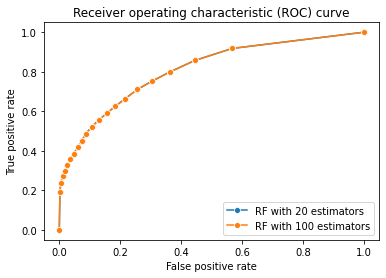

In [101]:
print('Plotting ROC Curve...')

fig = plt.figure()
ax = fig.add_subplot(111)


sns.lineplot(x=fpr_20, y=tpr_20, marker = 'o')
sns.lineplot(x=fpr_100, y=tpr_100, marker = 'o')

plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['RF with 20 estimators', 'RF with 100 estimators'])
plt.show()
    

In [102]:
auc_20 = auc(fpr_20,tpr_20)
print(auc_20)
auc_100 = auc(fpr_100,tpr_100)
print(auc_100)

0.8064678601864341
0.8064678601864341


### 3.5 Gradient Boosted Decision Tree

In [113]:
gbdt_2_model = GradientBoostingClassifier(n_estimators = 50,max_depth =2)
gbdt_2_model.fit(X_train,y_train)
gbdt_2_predictions = gbdt_2_model.predict_proba(X_test)[:,1].tolist()
gbdt_10_model = GradientBoostingClassifier(n_estimators = 50,max_depth =10)
gbdt_10_model.fit(X_train,y_train)
gbdt_10_predictions = gbdt_10_model.predict_proba(X_test)[:,1].tolist()

In [117]:
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)

print('Computing ROC Curve...')

fpr_2,tpr_2,thresholds_2 = roc_curve(y_test_binary,gbdt_2_predictions)
fpr_10,tpr_10,thresholds_10 = roc_curve(y_test_binary,gbdt_10_predictions)

print('End')

Computing ROC Curve...
End


Plotting ROC Curve...


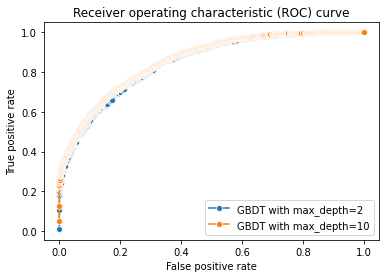

In [118]:
print('Plotting ROC Curve...')

fig = plt.figure()
ax = fig.add_subplot(111)


sns.lineplot(x=fpr_2, y=tpr_2, marker = 'o')
sns.lineplot(x=fpr_10, y=tpr_10, marker = 'o')

plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['GBDT with max_depth=2', 'GBDT with max_depth=10'])
plt.show()

In [119]:
auc_2 = auc(fpr_2,tpr_2)
print("AUC of the GBDT model with a max depth of 2 is {:.3f}".format(auc_2))
auc_10 = auc(fpr_10,tpr_10)
print("AUC of the GBDT model with a max depth of 10 is {:.3f}".format(auc_10))

AUC of the GBDT model with a max depth of 2 is 0.850
AUC of the GBDT model with a max depth of 10 is 0.860


Among the three models I've used, we can certainly conclude that Gradient boosted decision tree is the best as that AUC value. 